<a href="https://colab.research.google.com/github/mixkunanon/Covid19_EDA/blob/main/covid19_thailand_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Covid19 Thailand Analysis**

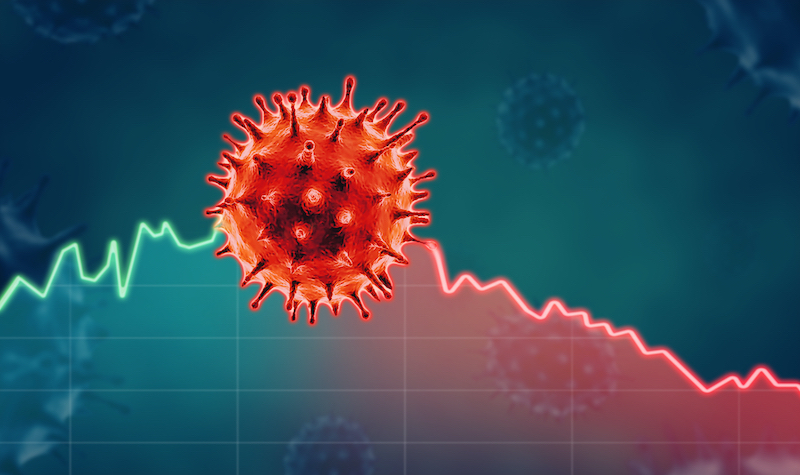

ในปัจจุบัน Covid19 เป็นโรคติดต่อซึ่งมีการแพร่ระบาดจากคนสู่คน ซึ่งจากข้อมูลใน https://data.go.th/en/dataset/covid-19-daily ได้เก็บรวมข้อมูลผู้ติดเชื้อในประเทศไทยโดยมี ข้อมูล 3 ชุดที่นำมาวิเคราะห์ดังนี้

1.ตั้งแต่วันที่ 12 มกราคม 2020 ถึง 28 ตุลาคม 2021 ซึ่งเป็นข้อมูลในช่วงปีต่อมาจนถึงช่วงปัจจุบันที่มีการแพร่การระบาดของโรคติดต่อนี้

ตั้งค่า Font ใน matplotlib เนื่องจาก ปัญหาเมื่อ พลอตกราฟ แล้วภาษาไทยมีปัญหา 


In [ ]:
# ดาวน์โหลด font th sarabun จาก github
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf

In [ ]:
# ตั้งค่าเพิ่ม font ที่เพิ่ม
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New')

#Import the Dataset 

นำข้อมูลที่โหลดมาไว้ใน google drive เชื่อม ข้อมูลกับ notebook 

In [ ]:
#เชื่อมต่อข้อมูลจาก Google drive กับ Colab Notebook
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Cleansing the Dataset

เนื่องจากข้อมูลมีข้อมูลที่มีปัญหา ค่อนข้างมาก ส่วนทั้งในส่วนที่เป็น dtype  ที่เป็น integer , object ซึ่งการทำความสะอาดข้อมูลเป็น pre-process analytics ที่สำคัญในการวิเคราะห์ การ cleansing ข้อมูลจึงสำคัญ โดย มี ขั้นตอนดังนี้ 

# EDA the Datasets

นำข้อมูลที่โหลดมมาได้นำมาไว้ใน google drive 

In [ ]:
#import library pandas 
import pandas as pd

df_covid19_1 = pd.read_csv('/content/drive/MyDrive/mid/Covid1.csv', index_col = 0)
df_covid19_2 = pd.read_csv('/content/drive/MyDrive/mid/Covid2.csv', index_col = 0)
df_covid19_3 = pd.read_csv('/content/drive/MyDrive/mid/Covid3.csv', index_col = 0)

df_covid19_1.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset
No.,,,,,,,,,,
1,12/1/2020,NaN,หญิง,61.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
2,17/1/2020,NaN,หญิง,74.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
3,22/1/2020,NaN,หญิง,73.0,ปี,Thailand,นครปฐม,คนต่างชาติเดินทางมาจากต่างประเทศ,นครปฐม,เมือง
4,22/1/2020,NaN,ชาย,68.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
5,24/1/2020,NaN,หญิง,66.0,ปี,China,นนทบุรี,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN


ข้อมูลจะมีทั้งหมด 3 ไฟล์ด้วยกัน ซึ่งในส่วนนี้จะดูข้อมูลโดยทั่วไปของ dataset และทำการรวม ข้อมูลไว้ใน dataframe เดียวกันเพื่อง่ายต่อการจัดการ

In [ ]:
df_covid19_1.shape , df_covid19_2.shape,df_covid19_3.shape

((839771, 10), (1042168, 10), (25816, 10))

ตรวจสอบข้อมูล shape ของ dataframe แต่ละอันก่อนทำการรวมข้อมูล

In [ ]:
df_covid19_3.tail()

,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset
No.,,,,,,,,,,
1884969,28/10/2021,27/10/2021,หญิง,37.0,ปี,NaN,กรุงเทพมหานคร,ทัณฑสถาน/เรือนจำ,NaN,NaN
1884970,28/10/2021,27/10/2021,หญิง,46.0,ปี,NaN,กรุงเทพมหานคร,ทัณฑสถาน/เรือนจำ,NaN,NaN
1884971,28/10/2021,27/10/2021,หญิง,48.0,ปี,NaN,กรุงเทพมหานคร,ทัณฑสถาน/เรือนจำ,NaN,NaN
1884972,28/10/2021,27/10/2021,ชาย,NaN,NaN,NaN,นครศรีธรรมราช,ทัณฑสถาน/เรือนจำ,NaN,NaN
1884973,28/10/2021,27/10/2021,ชาย,NaN,NaN,NaN,ตราด,ทัณฑสถาน/เรือนจำ,NaN,NaN


In [ ]:
#รวม Datasets ทั้งไว้ที่ใน Dataframe เดียวกัน และ Drop คอลลัมบ์ที่ไม่ต้องการออก
df_covid19 = pd.concat([df_covid19_1,df_covid19_2,df_covid19_3], axis=0).reset_index()

df_covid19.head()

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset
0,1,12/1/2020,NaN,หญิง,61.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
1,2,17/1/2020,NaN,หญิง,74.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
2,3,22/1/2020,NaN,หญิง,73.0,ปี,Thailand,นครปฐม,คนต่างชาติเดินทางมาจากต่างประเทศ,นครปฐม,เมือง
3,4,22/1/2020,NaN,ชาย,68.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
4,5,24/1/2020,NaN,หญิง,66.0,ปี,China,นนทบุรี,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN


หลังจากรวมข้อมูลได้นั้น ต้อง reset index ใหม่และกำจัดคอลลัมบ์ที่ไม่ต้องการทิ้งออก

In [ ]:
df_covid19.tail()

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset
1907750,1884969,28/10/2021,27/10/2021,หญิง,37.0,ปี,NaN,กรุงเทพมหานคร,ทัณฑสถาน/เรือนจำ,NaN,NaN
1907751,1884970,28/10/2021,27/10/2021,หญิง,46.0,ปี,NaN,กรุงเทพมหานคร,ทัณฑสถาน/เรือนจำ,NaN,NaN
1907752,1884971,28/10/2021,27/10/2021,หญิง,48.0,ปี,NaN,กรุงเทพมหานคร,ทัณฑสถาน/เรือนจำ,NaN,NaN
1907753,1884972,28/10/2021,27/10/2021,ชาย,NaN,NaN,NaN,นครศรีธรรมราช,ทัณฑสถาน/เรือนจำ,NaN,NaN
1907754,1884973,28/10/2021,27/10/2021,ชาย,NaN,NaN,NaN,ตราด,ทัณฑสถาน/เรือนจำ,NaN,NaN


In [ ]:
#เปลี่ยน type ของคอลลัมบ์ announce_date
df_covid19['announce_date'] = pd.to_datetime(df_covid19['announce_date'])
df_covid19['Notified date'] = pd.to_datetime(df_covid19['Notified date'])
#Drop Column 'Unit' เพื่อจัดให้คอลลัมบ์ที่ไม่จำเป็นออกไป และง่ายต่อการอ่าน
df_covid19 = df_covid19.drop(columns = ['Unit','No.'] )

df_covid19.head()

,announce_date,Notified date,sex,age,nationality,province_of_isolation,risk,province_of_onset,district_of_onset
0,2020-12-01,NaT,หญิง,61.0,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
1,2020-01-17,NaT,หญิง,74.0,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
2,2020-01-22,NaT,หญิง,73.0,Thailand,นครปฐม,คนต่างชาติเดินทางมาจากต่างประเทศ,นครปฐม,เมือง
3,2020-01-22,NaT,ชาย,68.0,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
4,2020-01-24,NaT,หญิง,66.0,China,นนทบุรี,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN


In [ ]:
df_covid19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1907755 entries, 0 to 1907754
Data columns (total 9 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   announce_date          datetime64[ns]
 1   Notified date          datetime64[ns]
 2   sex                    object        
 3   age                    object        
 4   nationality            object        
 5   province_of_isolation  object        
 6   risk                   object        
 7   province_of_onset      object        
 8   district_of_onset      object        
dtypes: datetime64[ns](2), object(7)
memory usage: 131.0+ MB


In [ ]:
df_covid19['age'] = pd.to_numeric(df_covid19['age'],downcast = 'float', errors = 'coerce')

จาก dataframe พบว่าเช็คข้อมูลแต่ละคอลลัมบ์พบว่าข้อมูลทุกคอลลัมบ์เป็น object ซึ่งยากที่จะนำไปวิเคราะห์ข้องมูลเชิงตัวเลขหรือข้อมูลใในเชิงสถิติ 

In [ ]:
def sex_format(text):
    if text == 'นาย':
        return 'ชาย'
    elif text == 'ชาย':
        return 'ชาย'
    elif text == 'หญิง':
        return 'หญิง'

df_covid19['sex'] = df_covid19['sex'].apply(sex_format)

sex_data = df_covid19['sex'].value_counts()

print(sex_data)

หญิง    928804
ชาย     874614
Name: sex, dtype: int64


In [ ]:
def nation_format(text):
    if text == 'Thailand':
        return 'Thai'
    elif text == 'cambodian' or text == 'cambodia' or text == 'Cambodia':
        return 'Cambodian' 
    elif text == 'China':
        return 'Chinese'
    elif text == 'Burma' or text == 'burmese' or text == 'burma':
        return 'Burmese' 
    elif text == 'Laos' or text == 'Laotian / Lao' or text == 'Laotian/Lao' or text == 'laos' :
        return 'Laotian'
    elif text == 'India':
        return 'Indian'
    elif text == 'France':
        return 'French'
    elif text == 'British / English' or text == 'United Kingdom':
        return 'Bristish/UK'
    elif text == 'Malaysia':
        return 'Malaysain'
    elif text == 'Japan':
        return 'Japanese'
    elif text == 'Guinea':
        return 'Guinean'
    elif text == 'United States of America' or text == 'อเมริกา':
        return 'American'
    elif text == 'Russia':
        return 'Russian'
    elif text == 'Vietnam':
        return 'Vietnamese'
    elif text == 'Germany':
        return 'German'
    return text

df_covid19['nationality']= df_covid19['nationality'].apply(nation_format)

df_covid19['nationality'].value_counts().head(20)


Thai            1563247
Burmese          131020
Cambodian         33588
Laotian            7400
Chinese            1084
Indian              718
Japanese            371
Guinean             333
Other               284
Bristish/UK         273
American            272
Vietnamese          249
French              202
Russian             175
Filipino            155
German              150
Malaysian            95
South Korean         94
Philippines          94
British              62
Name: nationality, dtype: int64

In [ ]:
def province_format(text):
    if text == 'กทม':
        return 'กรุงเทพมหานคร'
    return text

df_covid19['province_of_isolation'] = df_covid19['province_of_isolation'].apply(province_format)
df_covid19['province_of_onset'] = df_covid19['province_of_onset'].apply(province_format)

print(df_covid19.head())

  announce_date Notified date   sex   age nationality province_of_isolation  \
0    2020-12-01           NaT  หญิง  61.0     Chinese         กรุงเทพมหานคร   
1    2020-01-17           NaT  หญิง  74.0     Chinese         กรุงเทพมหานคร   
2    2020-01-22           NaT  หญิง  73.0        Thai                นครปฐม   
3    2020-01-22           NaT   ชาย  68.0     Chinese         กรุงเทพมหานคร   
4    2020-01-24           NaT  หญิง  66.0     Chinese               นนทบุรี   

                               risk province_of_onset district_of_onset  
0  คนต่างชาติเดินทางมาจากต่างประเทศ     กรุงเทพมหานคร               NaN  
1  คนต่างชาติเดินทางมาจากต่างประเทศ     กรุงเทพมหานคร               NaN  
2  คนต่างชาติเดินทางมาจากต่างประเทศ            นครปฐม             เมือง  
3  คนต่างชาติเดินทางมาจากต่างประเทศ     กรุงเทพมหานคร               NaN  
4  คนต่างชาติเดินทางมาจากต่างประเทศ     กรุงเทพมหานคร               NaN  


## Missing Values 

เช็คจากข้อมูลที่หายไปจำนวนของแต่ละคอลลัมบ์มีจำนวนเท่าไหร่บ้าง??

In [ ]:
#แต่ละคอลลัมบ์มีข้อมูลหายไปเท่าไหร่บ้าง
df_covid19.isna().sum()

announce_date                 0
Notified date              2795
sex                      104337
age                      158750
nationality              166007
province_of_isolation       272
risk                       1094
province_of_onset        247439
district_of_onset        318715
dtype: int64

In [ ]:
#จำนวน Null ทั้งหมดใน Dataframe
missing_values = df_covid19.isna().sum().sum()

print('Number of missing values is ',missing_values)

Number of missing values is  999409


In [ ]:
import numpy as np

total_data = np.product(df_covid19.shape)
#จำนวนข้อมูลทั้งหมดที่หายใน Dataframe คิดเป็นกี่เปอร์เซ็น
print(f'Missing Values in Dataset is {(missing_values/total_data)*100:.2f} % ')


Missing Values in Dataset is 5.82 % 


จากข้อมูลพบว่ามีจำนวนข้อมูลที่ว่างบน DataFrame มีทั้งหมด 999409 คิดเป็น 5.82 % ของข้อมูลมั้งหมด
ซึ่งมีไม่เยอะมาก และข้อมูลซึ่งข้อมูลที่หายเป็นข้อมูลใน dtypes ที่เป็น object ซะส่วนใหญ่ ซึ่งข้อมูลผู้ติดเชื้อ

## Visualize the Data

In [ ]:
#import libaries ที่จำเป็นในการทำ Data Visualization 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


ไลบารี่ที่ใช้ในการวิเคราะห์และดูค่าข้อมูลจะมี 2 ตัว คือ


1.   Pandas ใช้ manipulate ข้อมูลที่ต้องการ
2.   Numpy ใข้คำนวณหรือจัดการข้อมูลในเชิงตัวเลขเช่น mean,median , max หรือ อื่นๆ ที่ต้องการ





โดยไลบารี่ที่ใช้พลอตกราฟข้อมูลนั้นจะเป็นมี 3 ตัว คือ 
1.   Matplotlib ไลบารี่ พื้นฐาน
2.   Seaborn เป็นไลบารี่ แสดงข้อมูลทางสถิติเป็นไลบรารี Python ยอดนิยมสำหรับการดำเนินการ EDAและแสดงผลในรูปแบบ matplotlib และมีอินเทอร์เฟซระดับสูงสำหรับการวาดภาพกราฟิกทางสถิติที่น่าสนใจและให้ข้อมูลที่
3.   Plotly






** สำรวจข้อมูลพื้นฐานจากข้อมูลที่น่าสนใจ**

ตั้งเป้าหมายของการวิเคราะห์ข้อมูลโดย เลือกวิเคราะห์ตัวแปรที่น่าสนใจและเล
1.   ตั้งคำถาม เช่น
- กลุ่มประชากรในวัยอายุเท่าไหร่มีการติดเชื้อโควิดมากที่สุด
- ยอดผู้ติดเชื้อในแต่ละช่วงตั้งแต่เริ่มมีการระบาด
- ผู้ติดเชื้อสูงสุดในช่วงกลุ่มอายุใด

2.   ตั้งสมมุตติฐาน เช่น


*   กลุ่มที่มีการติดเชื้อมากที่สุดน่าจะเป็นกลุ่มวัยทำงานเนื่องจากมีการเดินทางพบ ปะผู้คนเยอะ
*   ผู้ป่วยที่มีการที่เชื่อมักอยู่ในจังหวัดกรุงเทพมหาคร


3.   หาคำตอบโดยใช้ข้อมูลมารองรับ


*   ข้อมูลตัวเลข
*   ข้อมูลเชิงสถิติ เช่น probability distribution
*   ข้อมูลในรูปแบบกราฟ





###  1.ข้อมูลเรื่องวันที่

ในปี 2020  และ 2021 มีจำนวนการติดเชื้อรายวันแต่ล้ะวันเป็นอย่างไร??


In [ ]:
covid19_year = df_covid19.groupby(df_covid19["announce_date"].dt.year)['announce_date'].count()

covid19_year

announce_date
2020       6884
2021    1900871
Name: announce_date, dtype: int64

จำนวนผู้ติดเชื้อเฉลี่ยในปี 2020 เท่ากับ 23 คน 

จำนวนผู้ติดเชื้อเฉลี่ยสูงสุดในปี 2020 เท่ากับ 576 คน

จำนวนผู้ติดเชื้อเฉลี่ยต่ำสุดในปี 2020 เท่ากับ 1 คน



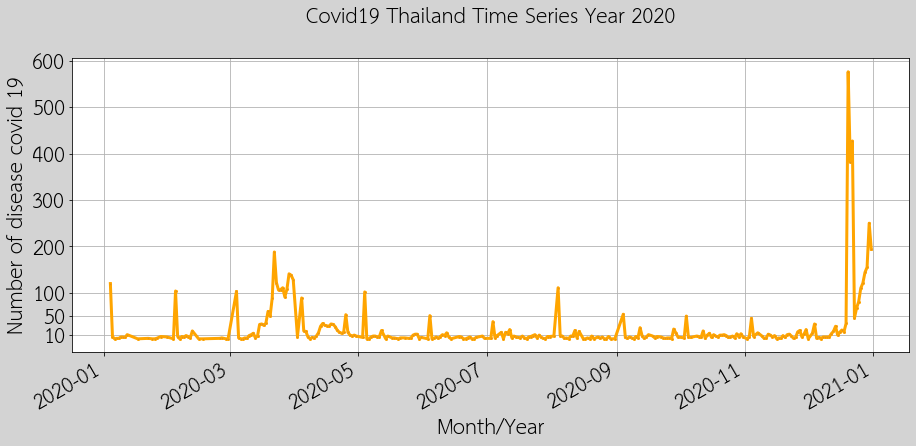

In [ ]:
covid19_year2020 = df_covid19[df_covid19["announce_date"].dt.year == 2020]['announce_date'].value_counts()

print(f'จำนวนผู้ติดเชื้อเฉลี่ยในปี 2020 เท่ากับ {round(covid19_year2020.mean())} คน \n')
print(f'จำนวนผู้ติดเชื้อเฉลี่ยสูงสุดในปี 2020 เท่ากับ {round(covid19_year2020.max())} คน\n')
print(f'จำนวนผู้ติดเชื้อเฉลี่ยต่ำสุดในปี 2020 เท่ากับ {round(covid19_year2020.min())} คน\n')

plt.figure(figsize = (15,6) , facecolor = 'lightgrey')
covid19_year2020.plot(kind = 'line',
                      linewidth = 3,
                      marker ='o', 
                      markersize=2,
                      markerfacecolor = 'peru',
                      fontsize = 20,
                      color = 'orange')

plt.title('Covid19 Thailand Time Series Year 2020',fontsize = 20,loc ='center',y=1.1)
plt.ylabel('Number of disease covid 19',
               fontsize = 20)
plt.xlabel('Month/Year',
               fontsize = 20)
plt.yticks([10,50,100,200,300,400,500,600])
plt.grid()
plt.show()

จำนวนผู้ติดเชื้อเฉลี่ยในปี 2021 เท่ากับ 6315 คน 

จำนวนผู้ติดเชื้อเฉลี่ยสูงสุดในปี 2021 เท่ากับ 45564 คน

จำนวนผู้ติดเชื้อเฉลี่ยต่ำสุดในปี 2021 เท่ากับ 26 คน



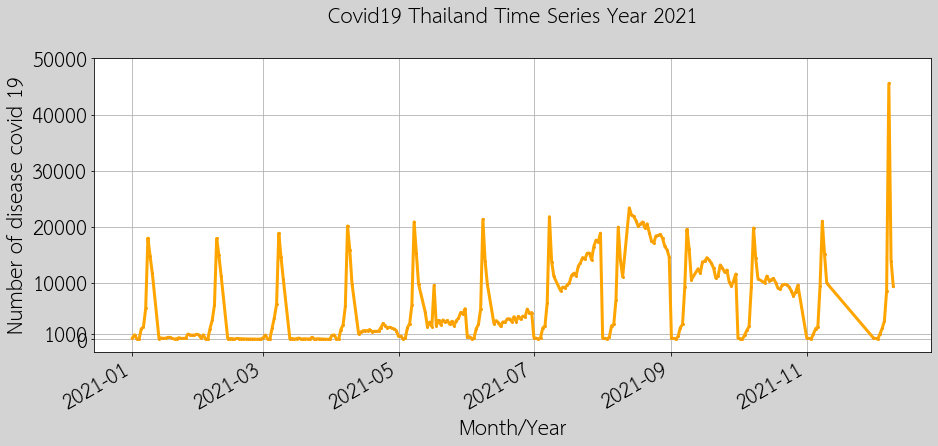

In [ ]:
covid19_year2021 = df_covid19[df_covid19["announce_date"].dt.year == 2021]['announce_date'].value_counts()

print(f'จำนวนผู้ติดเชื้อเฉลี่ยในปี 2021 เท่ากับ {round(covid19_year2021.mean())} คน \n')
print(f'จำนวนผู้ติดเชื้อเฉลี่ยสูงสุดในปี 2021 เท่ากับ {round(covid19_year2021.max())} คน\n')
print(f'จำนวนผู้ติดเชื้อเฉลี่ยต่ำสุดในปี 2021 เท่ากับ {round(covid19_year2021.min())} คน\n')

plt.figure(figsize = (15,6) , facecolor = 'lightgrey')
covid19_year2021.plot(kind = 'line',
                      linewidth = 3,
                      marker ='o', 
                      markersize=2,
                      markerfacecolor = 'peru',
                      fontsize = 20,
                      color = 'orange')

plt.title('Covid19 Thailand Time Series Year 2021',fontsize = 20,loc ='center',y=1.1)
plt.ylabel('Number of disease covid 19',
               fontsize = 20)
plt.xlabel('Month/Year',
               fontsize = 20)
plt.yticks([0,1000,10000,20000,30000,40000,50000])
plt.grid()
plt.show()

จำนวนผู้ติดเชื้อเฉลี่ยในปี 2020-2021 มีผู้ติดเชื้อจำนวน 79490  คน

จำนวนผู้ติดเชื้อที่มากสุดคือ เดือนสิงหาคม 2021 มีผู้ติดเชื้อจำนวน 423263  คน



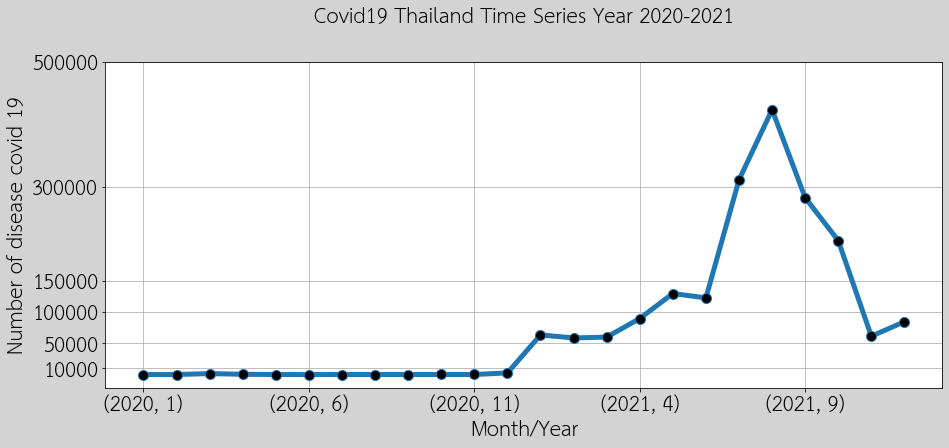

In [ ]:
#จำนวนผู้ติดเชื่อในแต่ล่ะเดือนตั้งแต่โดยเป็นข้อมูลแบบ time series
covid19_atime = df_covid19.groupby([df_covid19["announce_date"].dt.year,df_covid19["announce_date"].dt.month])['announce_date'].count()

print('จำนวนผู้ติดเชื้อเฉลี่ยในปี 2020-2021 มีผู้ติดเชื้อจำนวน',round(covid19_atime.mean()),' คน\n')
print('จำนวนผู้ติดเชื้อที่มากสุดคือ เดือนสิงหาคม 2021 มีผู้ติดเชื้อจำนวน',covid19_atime.max(),' คน\n')


plt.figure(figsize = (15,6) , facecolor = 'lightgrey')
covid19_atime.plot(kind= 'line',
                  linewidth = 5,
                  marker ='o', 
                  markersize=10,
                  markerfacecolor = 'black',
                  fontsize = 20)
plt.title('Covid19 Thailand Time Series Year 2020-2021',fontsize = 20,loc ='center',y=1.1)
plt.ylabel('Number of disease covid 19',
               fontsize = 20)
plt.xlabel('Month/Year',
               fontsize = 20)
plt.yticks([10000,50000,100000,150000,300000,500000])
plt.grid()
plt.show()

จากข้อมูลรายปีนั้น พบว่า

การจำนวนผู้ติดเชื้อในปี 2020 และ 2021 มีจำนวนต่างกันมาก แสดงให้เห็นว่าในปี 2020 เป็นปีที่มีการเริ่มต้นการระบาดและ สามารถควบคุมการแพร่กระจายได้ดีกว่า ซึ่งจากข้อมูลเชิงตัวเลขนั้นพบว่า มียอดผู้ติดเชื้อรวมไม่ถึงหลักหมื่น

ส่วนในปี 2021 มีผู้เชื้อยอดสะสม ถึงเกือบ 2 ล้านคน


**สรุปจากข้อมูลเรื่องวันที่**

ผู้ป่วยได้รับเชื้อไวรัส Covid19 นั้นเมื่อนำมาสรุปเป็นผลรวมยอดผู้ป่วยแต่ละเดือนนั้น จากข้อมูลที่ได้นั้น พบว่า ยอดผู้ติดเชื้อในช่วงปี 2020 นั้นมีจำนวนไม่มาก แต่ ใน ปี 2021 มียอดผู้ติดเชื้อสูงขึ้นในทุกๆเดือน โดนเพิ่มขึ้นตั้งแต่ในช่วงไตรมาสแรก ถึงไตรมาสสาม ซึ่งมีค่าสูงสุดในเดือน สิงหาคม ปี 2021 และ ค่อยๆลดลงเรื่อยๆนนถึงสิ้นปี

และ จากลักษณะกราฟข้อมูลตามช่วงเวลาตั้งแต่เกินโรคระบาดในประเทศไทยนั้น
มีลักษณะกราฟแบบ Exponentialในช่วงกลางปี หรือ ไตรมาสที่สอง และ ไตรมาสที่สาม ซึ่ง จากข้อมูล 



### 2.เพศ

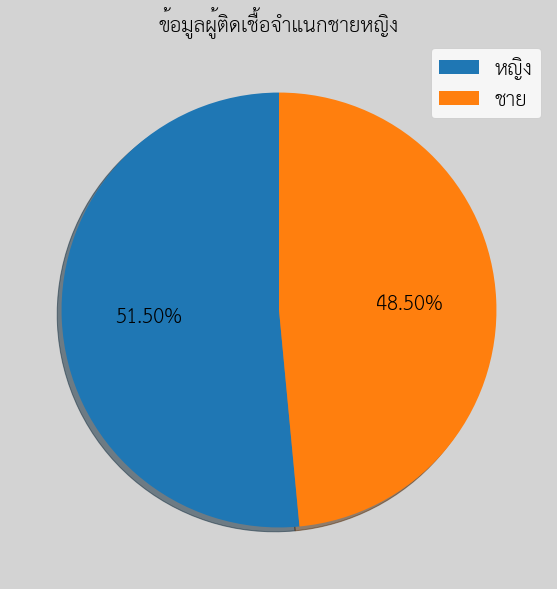

In [ ]:
plt.figure(figsize=(10,10),facecolor = 'lightgrey')
plt.title('ข้อมูลผู้ติดเชื้อจำแนกชายหญิง',
          fontsize =20)
plt.pie(sex_data,
        autopct= '%.2f%%',
        shadow=True,
        startangle = 90,
        
        textprops={'fontsize': 20})
plt.legend(['หญิง','ชาย'],loc = 'upper right',fontsize = 20)
plt.show()

**สรุปจากข้อมูลเรื่องเพศ**

1)จากข้อมูลที่ได้สรุปว่า จำนวนผู้ป่วยเพศชายและเพศหญิงมีจำนวนไม่แต่งต่างกันมาก

2) เพศไม่มีผลต่อการติดเชื้อโควิดจากข้อมูลตัวเลข





### 3.อายุ

ข้อมูลนี้เป็นคอลลัมบ์เดียวที่เป็นข้อมูลที่เป็น integer หรือ เป็นตัวเลข หรือ สามารถวิเคราะห์ในเชิงที่เป็นสถิติได้

การแจกแจงความน่าจะเป็นของอายุของผู้ติดเชื้อมีลักษณะเป็นอย่างไร???

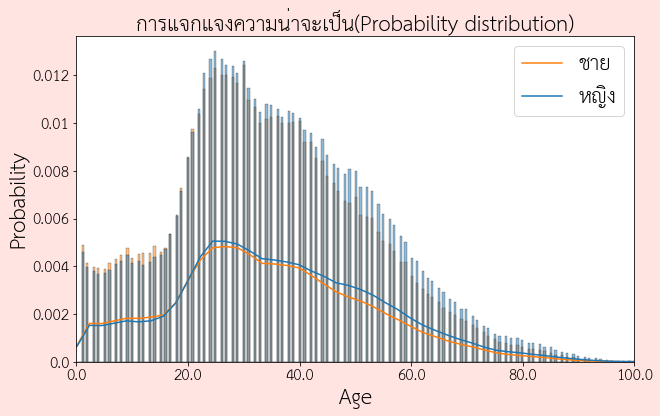

In [ ]:
fig ,ax = plt.subplots(figsize = (10,6),facecolor = 'mistyrose')
ax.set(xlim = (0,100))
age_dist = sns.histplot(data = df_covid19, x='age', kde= True,
                        stat = 'probability',
                        hue = 'sex')
age_dist.set_title('การแจกแจงความน่าจะเป็น(Probability distribution)',fontsize = 20)
age_dist.set_xlabel('Age',fontsize = 20)
age_dist.set_ylabel('Probability',fontsize = 20)
age_dist.set_yticklabels(age_dist.get_yticks(), size = 15)
age_dist.set_xticklabels(age_dist.get_xticks(), size = 15)
plt.legend(['ชาย','หญิง'],fontsize= 20, loc = 'upper right')

plt.show(age_dist)

จากข้อมูลการแจงแจงความน่าจะเป็นสามารถบอกแสดงให้เห็นว่า Proability ของผู้ติดเชื้อสูงสุดอยู่ในอายุช่วงอายุ 25-35 ปี และเพศชายและเพศหญิงมีลักษณะที่ไม่แตกต่างกันอย่างเห็นได้ชัด  จากการดูข้อมูลการแจกแจง ซึงยังไม่ค่อยเห็นภาพ เราจึงทำการแบ่งกลุ่มอายุออกเป็นกลุ่มเผื่อให้มองหรืออธิบายง่ายมากขึ่น 



จากข้อมูลเราแบ่งข้อมูลอายุออกเป็นกลุ่มดังนี้



1.   0-4 ปี  กลุ่มเด็กแรกเกิด
2.   4-12 ปี กลุ่มเด็กประถม
3.   12-18 ปี กลุ่มวัยรุ่นตอนต้น
4.   18-24 ปี กลุ่มวัยรุ่นตอนปลาย
5.   24-35  ปี กลุ่มวัยทำงานตอนต้น
6.  35-60 ปี กลุ่มวัยทำงานตอนปลาย
7.  60 ปีขึ้นไป กลุ่มผู้สูงอายุ

เผื่อง่ายต่อการวิเคราะห์จึงแบ่งเป็นช่วงอายุซึ่งการแบ่งจะสามารถนำไปวิเคราะห์ต่อง่าย



In [ ]:
range= [0,4,12,18,24,35,60,100]
labels = ['เด็กแรกเกิด','เด็กประถม','วัยรุ่นตอนต้น','วัยรุ่นตอนปลาย','วัยทำงานตอนต้น','วัยทำงานตอนปลาย','ผู้สูงอายุ']

df_covid19['AgeGroup'] = pd.cut(df_covid19['age'], bins=range, labels=labels, right=False)
age_group = df_covid19['AgeGroup'].value_counts(sort = False)

print(age_group)

เด็กแรกเกิด         44190
เด็กประถม          116153
วัยรุ่นตอนต้น       97404
วัยรุ่นตอนปลาย     187555
วัยทำงานตอนต้น     449658
วัยทำงานตอนปลาย    684177
ผู้สูงอายุ         169738
Name: AgeGroup, dtype: int64


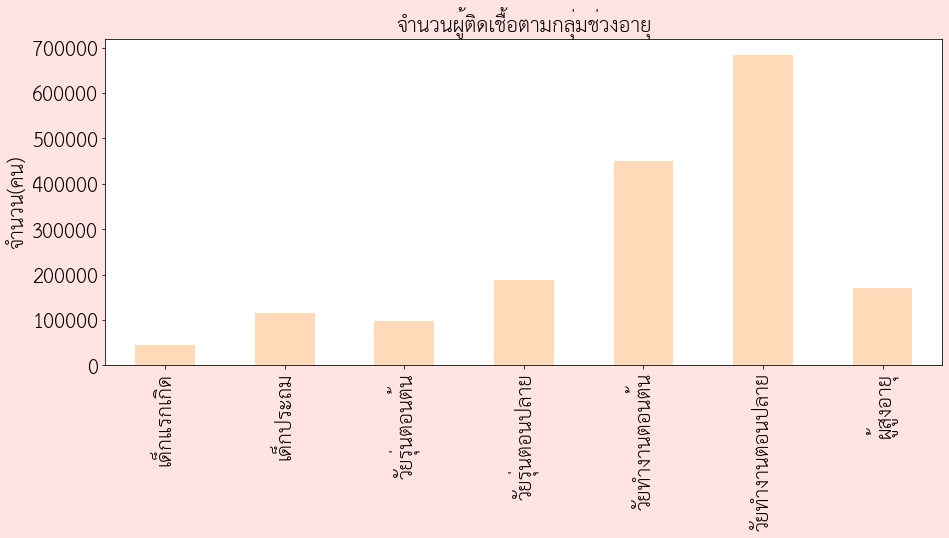

In [ ]:
plt.figure(figsize = (15,6),facecolor = 'mistyrose')
plt.title('จำนวนผู้ติดเชื้อตามกลุ่มช่วงอายุ',fontsize = 20)
plt.ylabel('จำนวน(คน)',fontsize = 20)
age_group.plot.bar(fontsize =20,color = 'peachpuff')
plt.show()

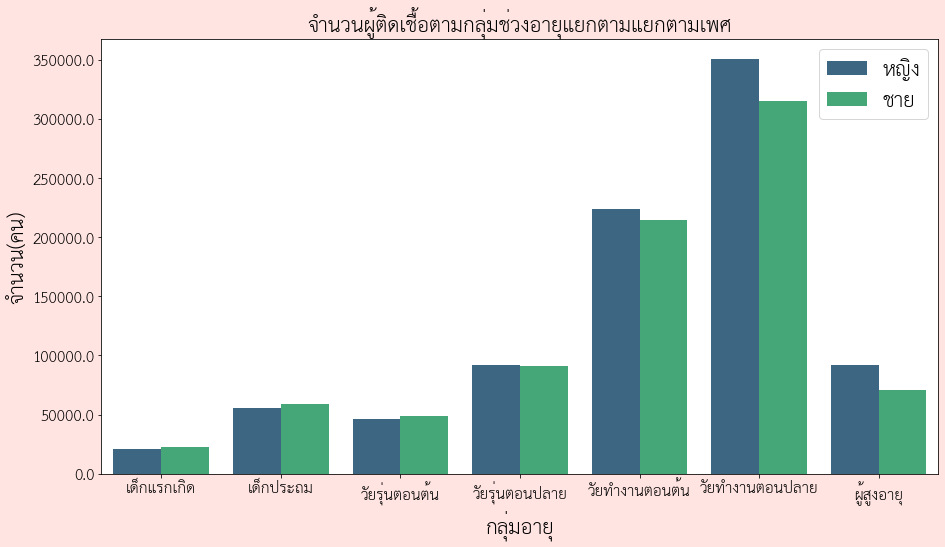

In [ ]:
m_age = df_covid19[df_covid19['sex'] == 'ชาย']['AgeGroup'].value_counts()
f_age = df_covid19[df_covid19['sex'] == 'หญิง']['AgeGroup'].value_counts()


plt.figure(figsize = (15,8),facecolor = 'mistyrose')
age_sex = sns.countplot(data = df_covid19,x = 'AgeGroup',hue = 'sex', palette='viridis')

age_sex.set_yticklabels(age_sex.get_yticks(), size = 15)
age_sex.set_xticklabels(['เด็กแรกเกิด','เด็กประถม','วัยรุ่นตอนต้น','วัยรุ่นตอนปลาย','วัยทำงานตอนต้น','วัยทำงานตอนปลาย','ผู้สูงอายุ'],size = 15)
plt.title('จำนวนผู้ติดเชื้อตามกลุ่มช่วงอายุแยกตามแยกตามเพศ',fontsize = 20)
plt.ylabel('จำนวน(คน)',fontsize = 20)
plt.xlabel('กลุ่มอายุ',fontsize = 20)
plt.legend(fontsize = 20)
plt.show()

sex                   ชาย      หญิง
AgeGroup                           
เด็กแรกเกิด      0.026973  0.023947
เด็กประถม        0.071282  0.062598
วัยรุ่นตอนต้น    0.059494  0.052426
วัยรุ่นตอนปลาย   0.110769  0.104713
วัยทำงานตอนต้น   0.261193  0.254290
วัยทำงานตอนปลาย  0.384030  0.397944
ผู้สูงอายุ       0.086258  0.104082


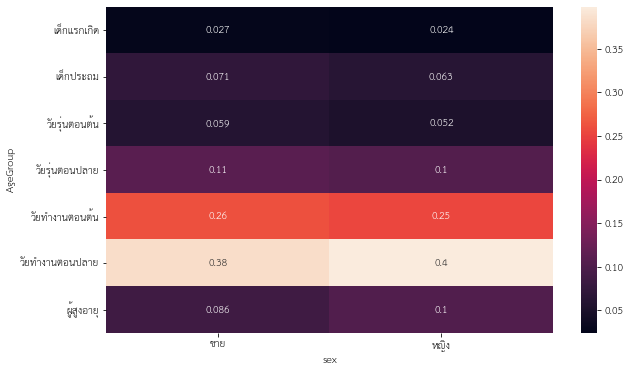

In [ ]:
ra =pd.crosstab(df_covid19['AgeGroup'],df_covid19['sex'],normalize = 1)

print(ra)
fig = plt.figure(figsize = (10,6))
a = sns.heatmap(ra,annot = True)
plt.show()

**สรุปจากข้อมูลเรื่องอายุ**


*   กลุ่มวัยทำงานมีการติดเชื้อมากที่สุด
*   อายุ ไม่สามารถสรุปผลกับการบอกว่าอายุมีผลต่อโควิด เนื่องจากต้องวิเคราะห์ปัจจัยเสี่ยงอีก



### 4.สัญชาติ

เนื่องจากข้อมูลสัญชาติของผู้ป่วยนั้นมีความหลากหลายมาก จึงทำกาารเลือกและ ส่วนมากเป็นผู้ป่วยชาวไทยเป็นส่วนใหญ่ มากกว่า 90% ของ ผู้ติตเชื้อทั้งหมด

ผู้ติดเชื้อโควิดในประเทศไทยนั้นน่าจะเป็นสัญชาติไทยมากที่สุดจริงหรือไม่???

Thai         1563247
Burmese       131020
Cambodian      33588
Laotian         7400
Chinese         1084
Name: nationality, dtype: int64


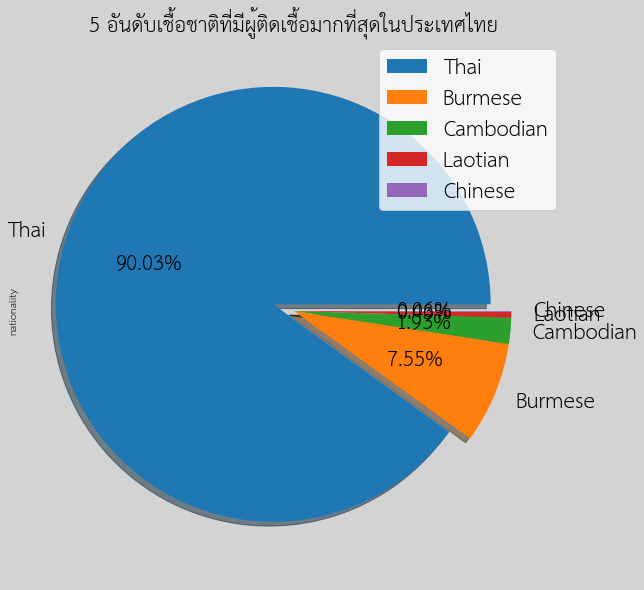

In [ ]:
top5_national = df_covid19['nationality'].value_counts(sort = True).head(5)

print(top5_national)

plt.figure(figsize=(10,10),facecolor ='lightgrey')
plt.title('5 อันดับเชื้อชาติที่มีผู้ติดเชื้อมากที่สุดในประเทศไทย',fontsize = 20)
top5_national.plot(kind = 'pie',
                   fontsize = 20,
                   shadow = True,
                   explode = (0.1,0,0,0,0),
                   autopct = '%.2f%%')
plt.legend(loc = 'upper right',fontsize = 20)
plt.show()

**สรุปจากข้อมูลสัญชาติ**



*   สัญชาติไม่ใช้ตัวแปรสำคัญหรือผลต่อการติดเชื้อ เนื่องจากเป็นผู้ติดเชื้อเป็นสัญชาติไทย และ อยู่ในประเทศไทย
* ผู้ติดเชื้อโควิดในประเทศไทยนั้นน่าจะเป็นสัญชาติไทยมากกว่า 90% 



### 5.ข้อมูลจังหวัดที่กักตัว กับ จังหวัดที่อยู่ตามทะเบียนบ้าน


ข้อมูลจังหวัดจะเป็นข้อมูลที่จะซัพพอตข้อมูลในส่วนอื่นๆได้

กรุงเทพมหาครนครน่าจะเป็นจังหวัดที่มีการระบาดมากที่สุดเนื่องจากเป็นเมืองสังคมของกลุ่มคนทำงาน จริงหรือไม่

In [ ]:
import plotly.graph_objects as go

top10_iso = df_covid19['province_of_isolation'].value_counts().head(10)

print(top10_iso)

labels = ['กรุงเทพมหานคร','สมุทรปราการ','สมุทรสาคร' ,'ชลบุรี' ,'นนทบุรี','สงขลา','ระยอง','ปทุมธานี','ยะลา','ราชบุรี']

fig = go.Figure(data=[go.Pie(labels=labels, values=top10_iso)])
fig.show()


กรุงเทพมหานคร    431127
สมุทรปราการ      126469
สมุทรสาคร        111527
ชลบุรี           104662
นนทบุรี           66074
สงขลา             47451
ระยอง             41521
ปทุมธานี          40685
ยะลา              40143
ราชบุรี           36599
Name: province_of_isolation, dtype: int64


สรุปจากข้อมูลจังหวัด


*   โซนจังหวัดกรุงเทพและปริมลฑล มีการติดเชื้อมากที่สุด
*   กรุงเทพเป็นจังหวัดที่มีประชาชนและแรงงานอาศัยออยู่มากที่สุดอาจจะทำให้เกิดการแพร่ระบาดได้มากที่สุด



In [ ]:
comparison_column = np.where(df_covid19["province_of_isolation"] == df_covid19["province_of_onset"], True, False)

df_cp = pd.Series(data = comparison_column)
iso_onset = df_cp.value_counts(1) 

t_iso = iso_onset[0]
f_iso =iso_onset[1]

print(f'จำนวนผู้ติดเชื้อที่มีกักตัวกับในจังหวัดเดียวกับจังหวัดมี่อยู่อาศัยตามทะเบียนบ้าน มีคิดเป็น {f_iso*100:.2f} %')


จำนวนผู้ติดเชื้อที่มีกักตัวกับในจังหวัดเดียวกับจังหวัดมี่อยู่อาศัยตามทะเบียนบ้าน มีคิดเป็น 78.01 %


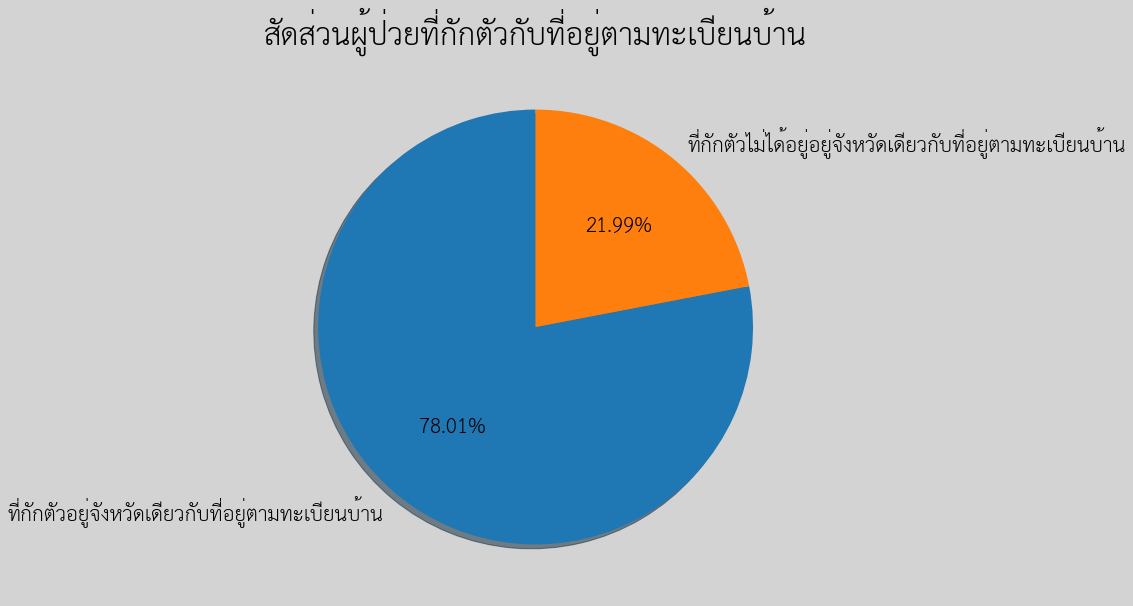

In [ ]:
label = ['ที่กักตัวอยู่จังหวัดเดียวกับที่อยู่ตามทะเบียนบ้าน', 'ที่กักตัวไม่ได้อยู่อยู่จังหวัดเดียวกับที่อยู่ตามทะเบียนบ้าน']

fig = plt.figure(figsize = (10,10),facecolor= 'lightgrey')
plt.title('สัดส่วนผู้ป่วยที่กักตัวกับที่อยู่ตามทะเบียนบ้าน',fontsize = 30)
plt.pie(iso_onset,
        labels = label,
        autopct='%.2f%%',
        startangle=90,
        shadow=True,
        textprops = {'fontsize': 20})

plt.show()


**สรุปจากข้อมูลจังหวัดที่ติดเชื้อกักตัวและที่อยู่ตามทะเบียนบ้าน**



*   ผู้ติดเชื้อส่วนมากมาจากการส่วนมากจะอยู่อาศัยที่เดียวกับกับที่ทำงานซึ่งอาจจะเป็นกลุ่มวัยทำงาน
*   กลุ่มผู้ที่ไม่ได้กักตัวติดเชื้อในจังหวัด อาจถูกนำไปจังหวัดที่ใกล้เคียง



### 6.ปัจจัยเสี่ยง

ปัจจัยเสี่ยงที่มากที่สุดน่าจะมาจากการใช้ชีวิตประจำวัน เช่น การทำงาน พบปะผู้คน กิจกรรมในที่สาธารณะอื่นๆ

สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้         791115
อื่นๆ                                               449534
การค้นหาผู้ป่วยเชิงรุกและค้นหาผู้ติดเชื้อในชุมชน    235154
อยู่ระหว่างการสอบสวน                                186097
ทัณฑสถาน/เรือนจำ                                     73581
Name: risk, dtype: int64


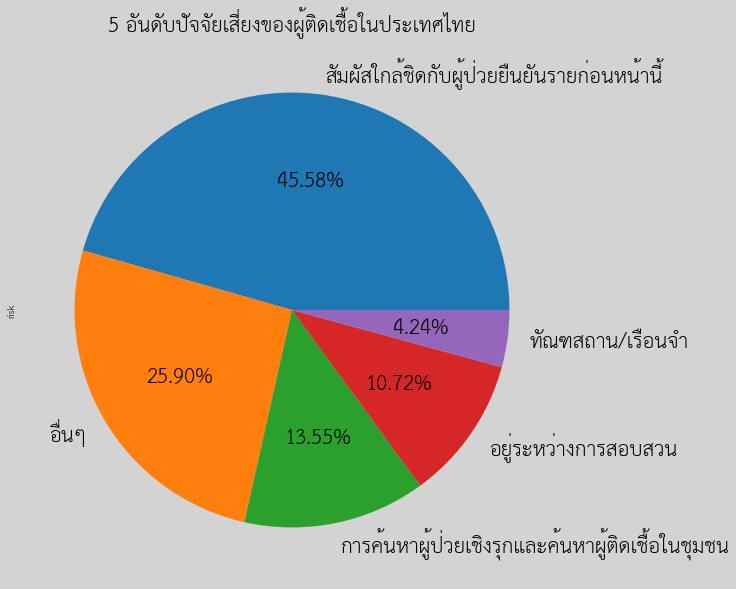

In [ ]:
top5_risk = df_covid19['risk'].value_counts().head(5)

print(top5_risk)
plt.figure(figsize=(10,10),facecolor ='lightgrey')
plt.title('5 อันดับปัจจัยเสี่ยงของผู้ติดเชื้อในประเทศไทย',fontsize = 20)
top5_risk.plot(kind = 'pie',fontsize = 20,autopct = '%.2f%%')
plt.show()

**สรุปจากปัจจัยเสี่ยง**


*   ผู้ติดเชื้อมักติดเชื้อจากกลุ่มคนใกล้ตัว และ จากกิจกรรมต่างๆในที่สาธารณะ โดยซัพพอต ในส่วนของกลุ่มอายุที่มีการเข้าสังคม ทำงาน คือกลุ่มวัยทำงานที่ต้องพบปะผู้คน





# Conclusion

จากข้อมูลที่ได้สรุปได้ดังนี้ 
    
กลุ้มผู้ติดเชื้อโควิดในประเทศไทยในช่วงปี 2020 ถึง ปี 2021 สถานการณ์การแพร่ระบาดของโรคติดเชื้อ Covid- 2019 ได้แพร่ระบาดอย่างกว้างขวางในจังหวัดเมืองหลวงอย่างกรุงเทพเป็นอย่างมาก โดยในปี 2020 มีการระบาดน้อยมากเมื่อเทียบกับการระบาดในปี 2021 ซึ่งต่างกันหลักล้านคน ซึ่งกลุ่มที่ติดเชื้อส่วนมากเป็นกลุ่มวัยทำงาน ที่มีอายุตั้งแต่ 24 ปี ถึง 60 ปี  ที่สูงกว่ากลุ่มอื่นเท่าตัว ซึ่งอาจจะเกิดจากกปัจจัย หลัก เช่น สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้  ซึ่งอาจจะเกิดจากการพบปะผู้คนจากการทำงาน กินข้าว การใช้ชีวิตประจำวัน  ในสังคมเมืองอย่างในจังหวัดกรุงเทพมหานคร และ จังหวัดใกล้เคียง ซึ่งเป็นปัจจัยการแพร่ระบาดสูงสุด